<a href="https://colab.research.google.com/github/steverothman1/heart_analysis/blob/main/heart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk
from scipy.stats import anderson
from scipy.stats import chisquare

In [ ]:
!pip install dython
from dython import nominal

In [ ]:
url = 'https://raw.githubusercontent.com/steverothman1/heart_analysis/main/heart.csv'

In [ ]:
heart = pd.read_csv(url)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Check for Missing Values

In [ ]:
null_list = heart.isnull().sum()
null_DF=pd.DataFrame(null_list)
null_DF.columns = ["Missing Values"]
null_DF

,Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [ ]:
heart.shape

(303, 14)

Check for Duplicates

In [ ]:
heart.duplicated().sum()

1

In [ ]:
heart[heart.duplicated(keep=False)==True]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
heart.drop_duplicates(inplace=True)

In [ ]:
heart.shape

(302, 14)

In [ ]:
column_list = list(heart.columns)
heart_continuous=['age','trtbps','chol','thalachh','oldpeak']
heart_categorical=[]
for feature in column_list:
  if feature not in heart_continuous:
    heart_categorical.append(feature)
print(heart_continuous)
print(heart_categorical)

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


Univariate Feature Analysis

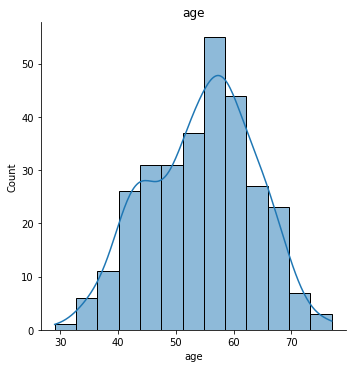

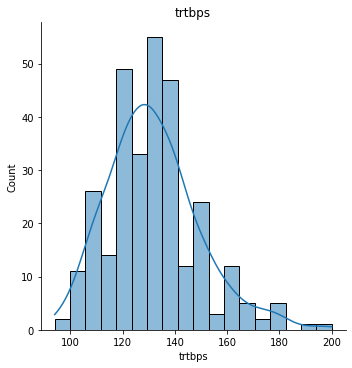

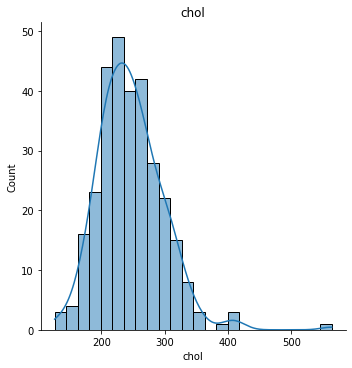

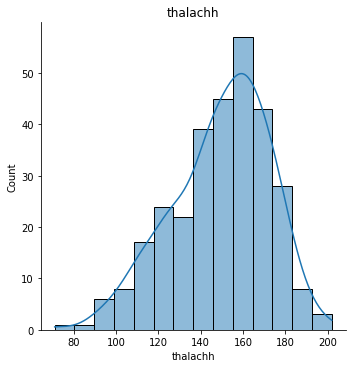

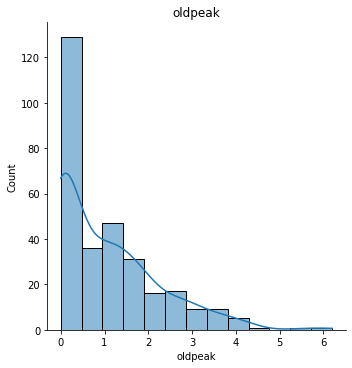

In [ ]:
for item in heart_continuous:
  sns.displot(heart, x=item, kind='hist',kde=True)
  plt.title(item)  
  plt.show()

Univariate Analysis with Target

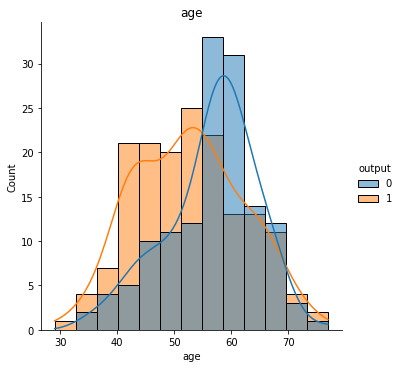

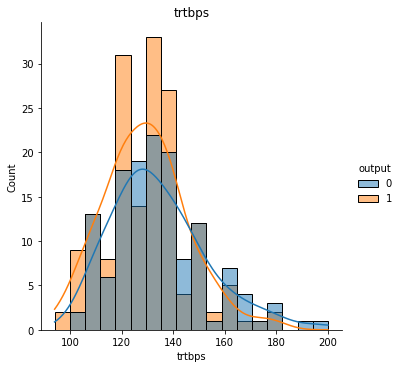

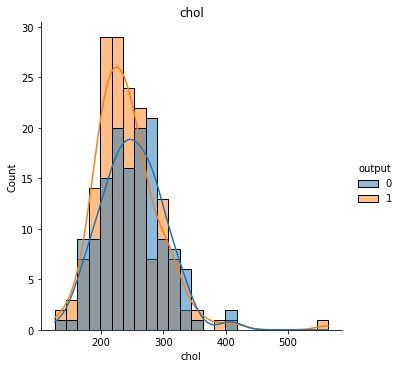

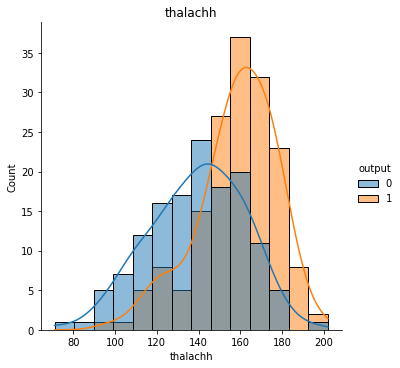

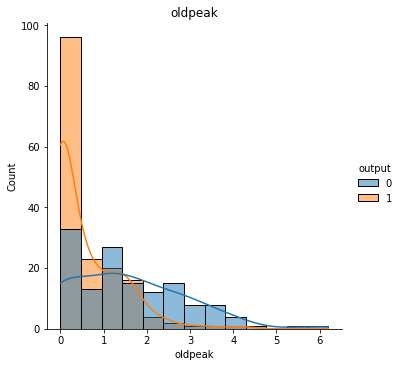

In [ ]:
for item in heart_continuous:
  sns.displot(heart, x=item, kind='hist', hue='output',kde=True)
  plt.title(item)  
  plt.show()

Box Plots for Continuous Variables with Target

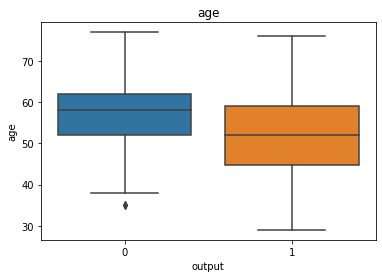

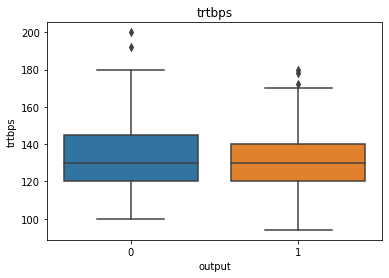

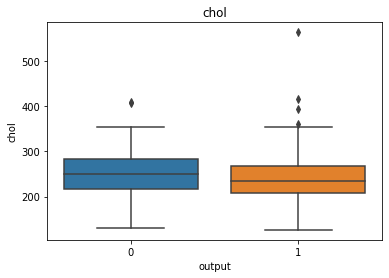

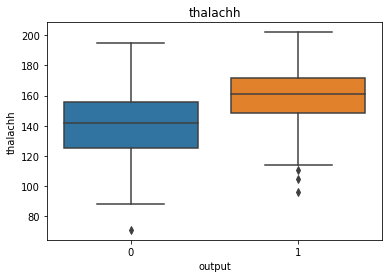

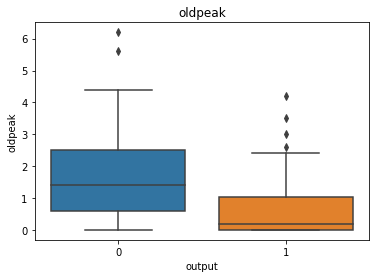

In [ ]:
for item in heart_continuous:
  sns.boxplot(y=item, x='output',data=heart)
  plt.title(item)  
  plt.show()

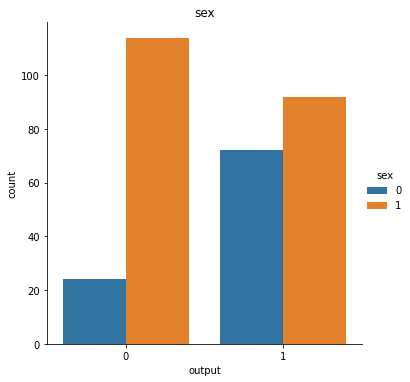

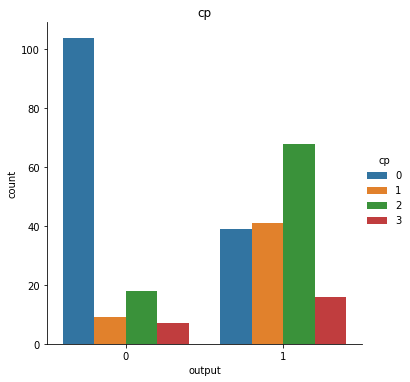

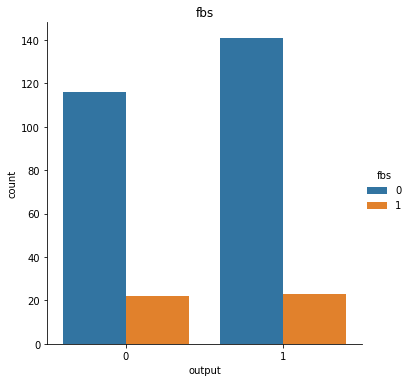

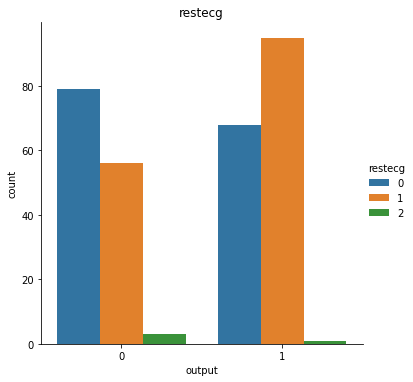

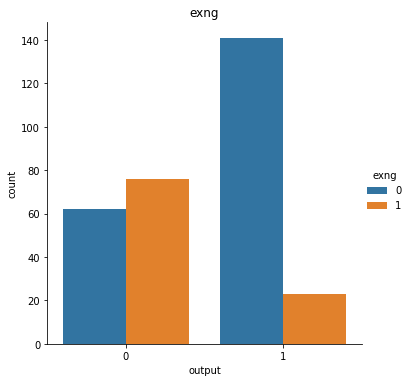

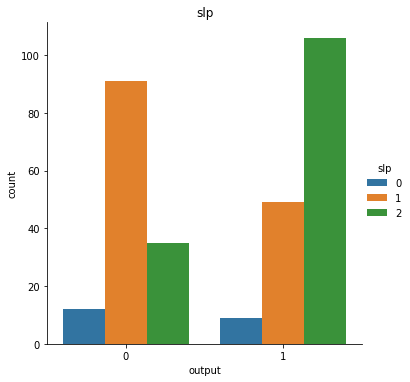

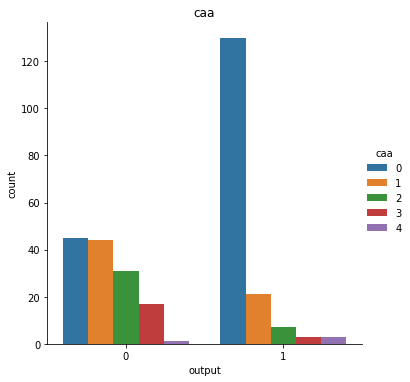

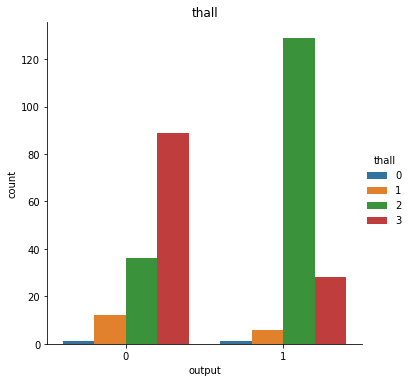

In [ ]:
'''for item in heart_categorical[:-1]:
  sns.catplot(x=item, kind="count", hue="output", data=heart)
  plt.title(item)
  plt.show'''
for item in heart_categorical[:-1]:
  sns.catplot(x="output", kind="count", hue=item, data=heart)
  plt.title(item)
  plt.show

Correlations of Continuous Features with Categorical Target

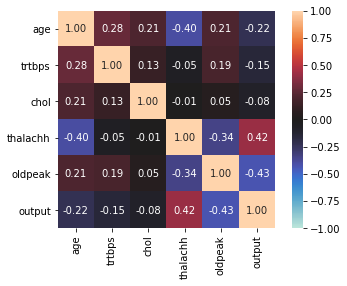

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdc2054e190>,
 'corr':                age    trtbps      chol  thalachh   oldpeak    output
 age       1.000000  0.283121  0.207216 -0.395235  0.206040 -0.221476
 trtbps    0.283121  1.000000  0.125256 -0.048023  0.194600 -0.146269
 chol      0.207216  0.125256  1.000000 -0.005308  0.050086 -0.081437
 thalachh -0.395235 -0.048023 -0.005308  1.000000 -0.342201  0.419955
 oldpeak   0.206040  0.194600  0.050086 -0.342201  1.000000 -0.429146
 output   -0.221476 -0.146269 -0.081437  0.419955 -0.429146  1.000000}

In [ ]:
nominal.associations(heart[heart_continuous+['output']])

Correlation of Categorical Features with Categorical Target

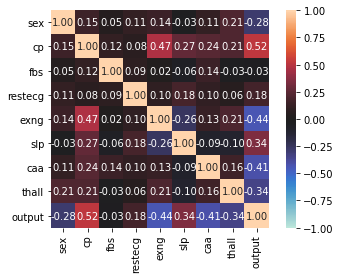

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdc20a26950>,
 'corr':               sex        cp       fbs  ...       caa     thall    output
 sex      1.000000  0.153336  0.046022  ...  0.113060  0.211452 -0.283609
 cp       0.153336  1.000000  0.115160  ...  0.236183  0.211750  0.517824
 fbs      0.046022  0.115160  1.000000  ...  0.144935 -0.032752 -0.026826
 restecg  0.110818  0.075265  0.086128  ...  0.104217  0.060286  0.179492
 exng     0.143460  0.470386  0.024729  ...  0.125377  0.205826 -0.435601
 slp     -0.032990  0.265800 -0.058654  ... -0.092236 -0.103314  0.343940
 caa      0.113060  0.236183  0.144935  ...  1.000000  0.160085 -0.408992
 thall    0.211452  0.211750 -0.032752  ...  0.160085  1.000000 -0.343101
 output  -0.283609  0.517824 -0.026826  ... -0.408992 -0.343101  1.000000
 
 [9 rows x 9 columns]}

In [ ]:
nominal.associations(heart[heart_categorical], nominal_columns=['cp','restecg'])

Bivariate Analysis

      age : trtbps
      age : chol
      age : thalachh
      age : oldpeak
   trtbps : chol
   trtbps : thalachh
   trtbps : oldpeak
     chol : thalachh
     chol : oldpeak
 thalachh : oldpeak


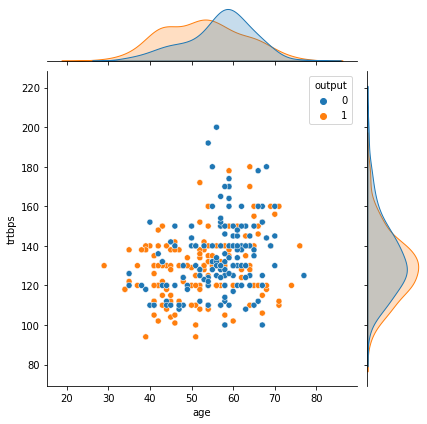

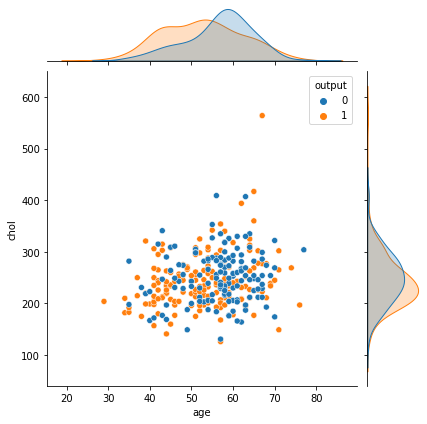

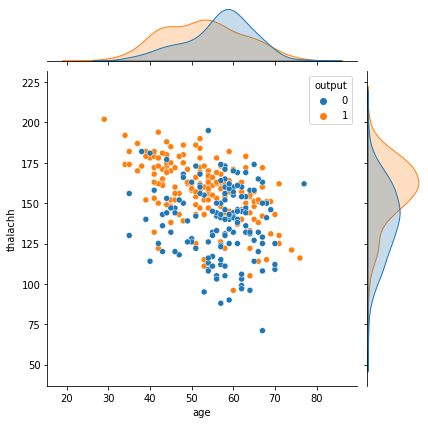

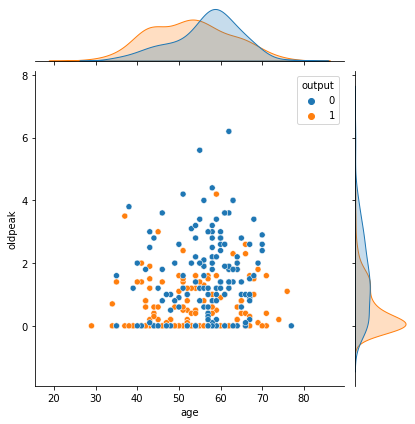

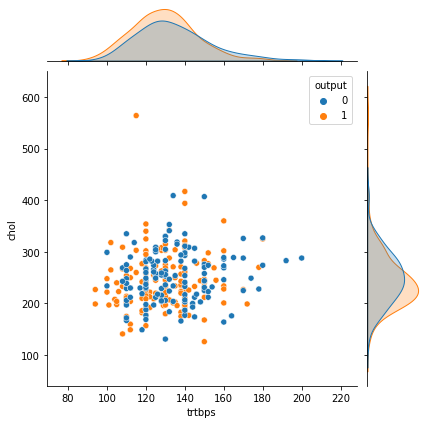

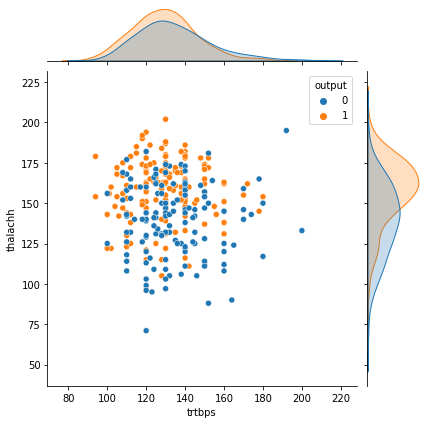

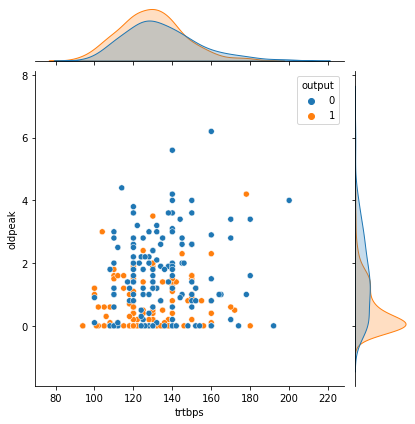

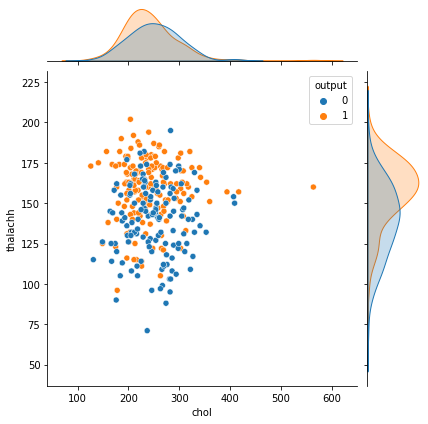

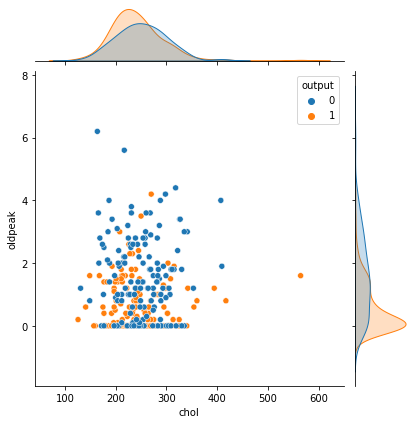

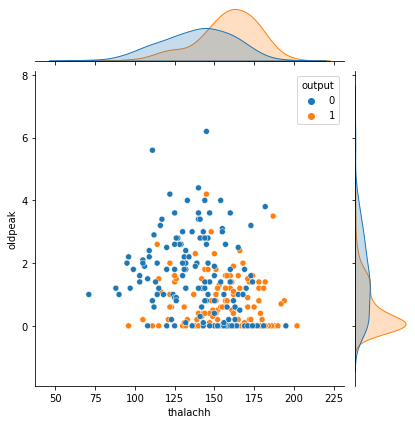

In [ ]:
for number,item in enumerate(heart_continuous):
  for item2 in heart_continuous[number+1:]:
    print(f'{item:>9} : {item2}')
    sns.jointplot(data=heart,x=item,y=item2,hue='output')

Transformation of Ordinal Categorical Data

In [ ]:
from scipy.stats import ttest_ind
for item in heart_continuous:
  cat1 = heart[heart['output']==0]
  cat2 = heart[heart['output']==1]
  print(item,ttest_ind(cat1[item], cat2[item]))

age Ttest_indResult(statistic=3.9337655411101426, pvalue=0.00010394837285416688)
trtbps Ttest_indResult(statistic=2.5609912831268065, pvalue=0.010926538861949147)
chol Ttest_indResult(statistic=1.4152344258787561, pvalue=0.15803697464249714)
thalachh Ttest_indResult(statistic=-8.014848252140112, pvalue=2.4761460479234722e-14)
oldpeak Ttest_indResult(statistic=8.229333553924688, pvalue=5.814566948031283e-15)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OneHotEncoder(drop='first', sparse=False)
nominal = enc.fit_transform(heart[['cp','restecg']])
nominal_df = pd.DataFrame(nominal)
nominal_x = enc.fit(heart[['cp','restecg']])

NameError: ignored